In [1]:
# From https://ourworldindata.org/covid-vaccinations

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter, NullFormatter, FuncFormatter

In [18]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [19]:
df = pd.read_csv(url, parse_dates=['date'])

In [20]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171587 entries, 0 to 171586
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    171587 non-null  object        
 1   continent                                   161345 non-null  object        
 2   location                                    171587 non-null  object        
 3   date                                        171587 non-null  datetime64[ns]
 4   total_cases                                 168309 non-null  float64       
 5   new_cases                                   168104 non-null  float64       
 6   new_cases_smoothed                          166097 non-null  float64       
 7   total_deaths                                150285 non-null  float64       
 8   new_deaths                                  150285 non-null  float64      

In [21]:
# Only include features that are related to vaccines
vaccine_df = df[[
    'iso_code',
    'continent',
    'location',
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'total_boosters',
    'new_vaccinations',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred'
]]

In [22]:
vaccine_df.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
vaccine_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [24]:
# Limit the data to only United States
us_vaccine = vaccine_df[vaccine_df.location == 'United States']

In [25]:
us_vaccine.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
162197,USA,North America,United States,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162198,USA,North America,United States,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162199,USA,North America,United States,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162200,USA,North America,United States,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162201,USA,North America,United States,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


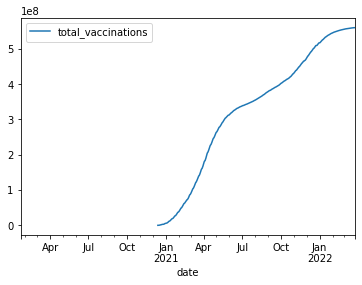

In [26]:
us_vaccine.plot(x='date', y='total_vaccinations')

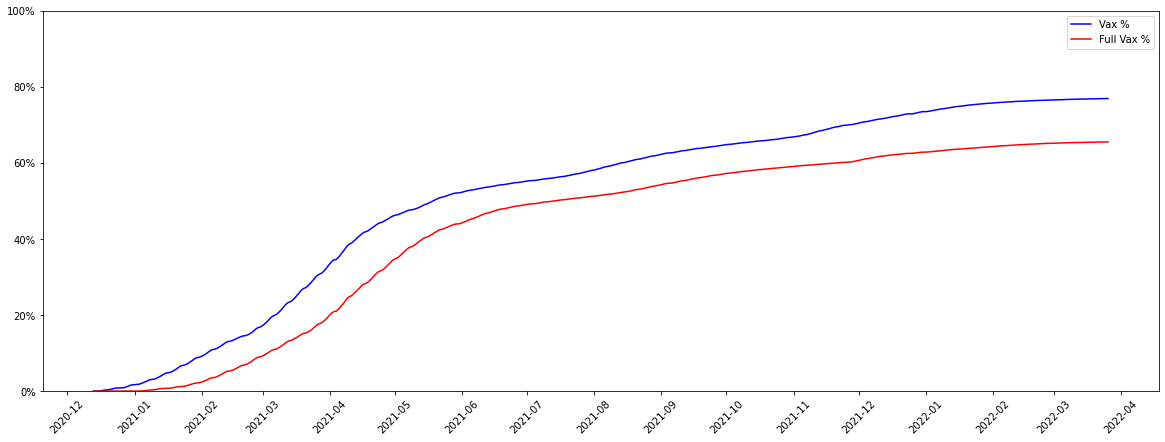

In [29]:
fig, ax = plt.subplots(figsize=(20,7))

# Plot the dates on the x axis and the percentage of people vaccinated on the y axis
ax.plot(us_vaccine.date, us_vaccine.people_vaccinated_per_hundred, color='blue', label='Vax %')
ax.plot(us_vaccine.date, us_vaccine.people_fully_vaccinated_per_hundred, color='red', label='Full Vax %')

# Format the dates on the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

# Format the y axis as a percentage
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.ylim(0, 100) # Force the graph to go to 100%
plt.show()

In [33]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fm' % (x * 1e-6)

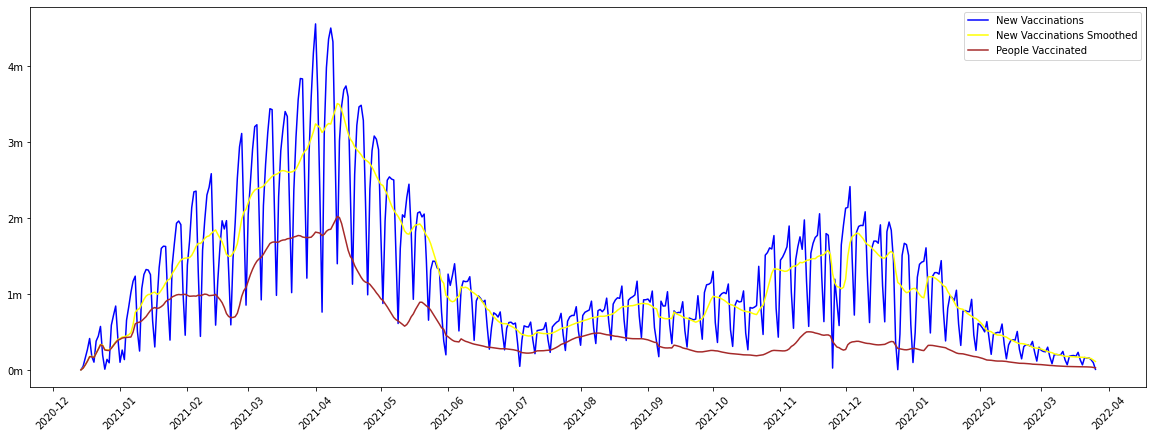

In [34]:
fig, ax = plt.subplots(figsize=(20,7))

# Plot the dates on the x axis and the percentage of people vaccinated on the y axis
ax.plot(us_vaccine.date, us_vaccine.new_vaccinations, color='blue', label='New Vaccinations')
ax.plot(us_vaccine.date, us_vaccine.new_vaccinations_smoothed, color='yellow', label='New Vaccinations Smoothed')
ax.plot(us_vaccine.date, us_vaccine.new_people_vaccinated_smoothed, color='brown', label='People Vaccinated')

# Format the dates on the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

# Format the y axis in millions
millionsFormatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(millionsFormatter)
ax.yaxis.set_minor_formatter(NullFormatter())

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

In [35]:
us_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 162197 to 162992
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    796 non-null    object        
 1   continent                                   796 non-null    object        
 2   location                                    796 non-null    object        
 3   date                                        796 non-null    datetime64[ns]
 4   total_vaccinations                          469 non-null    float64       
 5   people_vaccinated                           469 non-null    float64       
 6   people_fully_vaccinated                     469 non-null    float64       
 7   total_boosters                              226 non-null    float64       
 8   new_vaccinations                            468 non-null    float64       
 9   ne

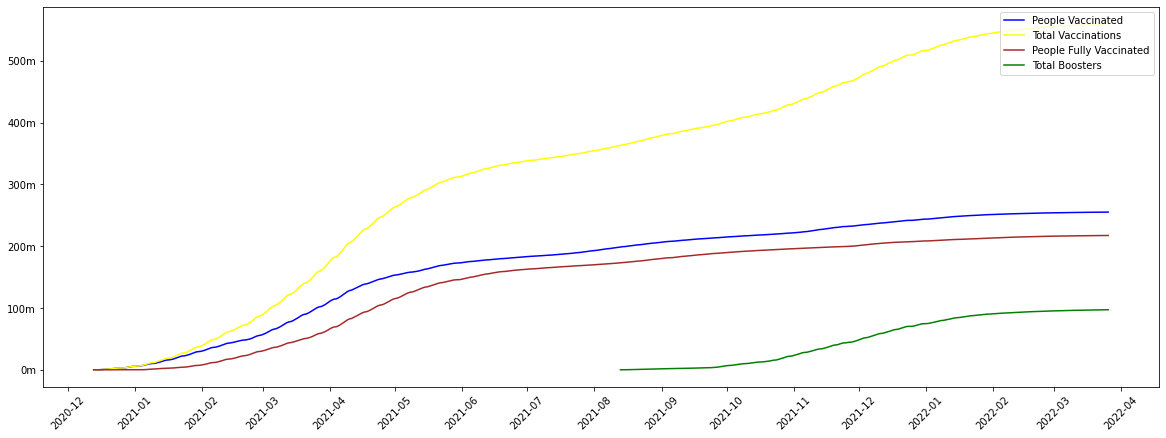

In [38]:
fig, ax = plt.subplots(figsize=(20,7))

# Plot the dates on the x axis and the percentage of people vaccinated on the y axis
ax.plot(us_vaccine.date, us_vaccine.people_vaccinated, color='blue', label='People Vaccinated')
ax.plot(us_vaccine.date, us_vaccine.total_vaccinations, color='yellow', label='Total Vaccinations')
ax.plot(us_vaccine.date, us_vaccine.people_fully_vaccinated, color='brown', label='People Fully Vaccinated')
ax.plot(us_vaccine.date, us_vaccine.total_boosters, color='green', label='Total Boosters')

# Format the dates on the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

# Format the y axis in millions
millionsFormatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(millionsFormatter)
ax.yaxis.set_minor_formatter(NullFormatter())

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

In [39]:
vaccine_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20States.csv'
vaccines = pd.read_csv(vaccine_url, parse_dates=['date'])

In [40]:
vaccines.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United States,2020-12-13,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,30371,25191,5915,0
1,United States,2020-12-14,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,34952,29611,6035,0
2,United States,2020-12-15,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,84730,77059,6299,0
3,United States,2020-12-16,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,244664,231593,6776,0
4,United States,2020-12-17,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,517295,497093,7529,0


In [41]:
vaccines.vaccine.unique()

array(['Pfizer/BioNTech', 'Moderna, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Pfizer/BioNTech'], dtype=object)

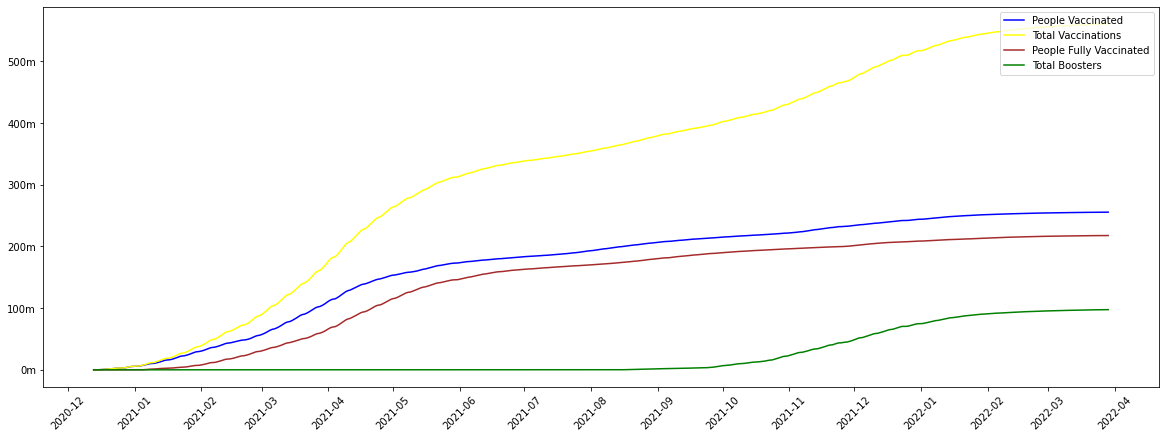

In [42]:
fig, ax = plt.subplots(figsize=(20,7))

# Plot the dates on the x axis and the percentage of people vaccinated on the y axis
ax.plot(vaccines.date, vaccines.people_vaccinated, color='blue', label='People Vaccinated')
ax.plot(vaccines.date, vaccines.total_vaccinations, color='yellow', label='Total Vaccinations')
ax.plot(vaccines.date, vaccines.people_fully_vaccinated, color='brown', label='People Fully Vaccinated')
ax.plot(vaccines.date, vaccines.total_boosters, color='green', label='Total Boosters')

# Format the dates on the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

# Format the y axis in millions
millionsFormatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(millionsFormatter)
ax.yaxis.set_minor_formatter(NullFormatter())

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()